In [43]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim, linear_approx

$R_S >= \frac{1}{2\pi f_1C_S}$

$R_S = -\frac{V_{GS}}{I_{DS}}, R_G=100\text{kΩ}$

$f_1 = \frac{1}{2\pi C_CR_G} = 50\text{Hz}$

In [44]:
g_m = 1.37e-3
V_DS = 10
V_GS = 0.67
I_D = 5e-4
R_G = 100e3
f_1 = 50

In [45]:
R_S = V_GS/I_D
C_C = 1/(2*np.pi*f_1*R_G)
C_Smin = 1/(2*np.pi*f_1*R_S)
C_S = 10e-6
Z_S = 1/(1/R_S + 2*np.pi*f_1*C_S*1j)
print(f"{R_S=}, {C_C=}, {C_S=} >= {C_Smin}, {np.abs(Z_S/R_S)=}")

R_S=1340.0, C_C=3.183098861837907e-08, C_S=1e-05 >= 2.3754469118193335e-06, np.abs(Z_S/R_S)=0.23111359017851912


In [ ]:
# 実測
C_S = 10.21e-6
C_C = 32.71e-9

In [46]:
data_d = pd.read_excel("data.xlsx", sheet_name="(4)(d)", skiprows=[1])
data_d.sort_values(by="v_i", axis=0, inplace=True, ascending=True)
data_d["phase"] = data_d["time"] / 1e-3 * 360
data_d

,v_i,v_o,time,phase
0,0,0,0,0.0


In [49]:
data_3 = pd.read_excel("data.xlsx", sheet_name="(3)", skiprows=[0, 2], header=[0])
data_3.sort_values(by="V_GS", axis=0, inplace=True, ascending=True)
data_3

,V_GS,V_DS
0,0.00,0.559
6,0.10,0.638
18,0.15,0.686
7,0.20,0.740
8,0.30,0.953
9,0.40,2.166
19,0.45,3.675
1,0.50,5.080
20,0.55,6.790
10,0.60,8.216


# (d)$v_i$ - $v_o$特性

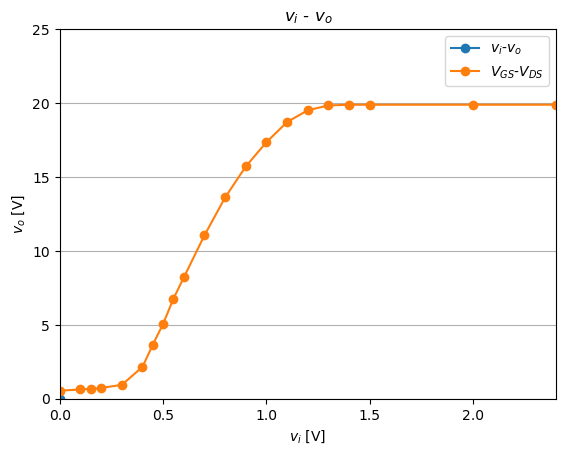

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$v_i$ [V]", grid="y", ylabel="$v_o$ [V]", title="$v_i$ - $v_o$", xlim=(0, 2.4), ylim=(0, 25))
ax.plot(data_d["v_i"], data_d["v_o"], marker="o", label="$v_i$-$v_o$")
ax.plot(data_3["V_GS"], data_3["V_DS"], marker="o", label="$V_{GS}$-$V_{DS}$")
axessetting.apply_axes(ax)


# (e) 周波数特性

In [ ]:
data_e = pd.read_excel("data.xlsx", sheet_name="(4)(e)", skiprows=[1])
data_e.sort_values(by="v_i", axis=0, inplace=True, ascending=True)
data_e["phase"] = data_e["time"] / 1e-3 * 360
data_e

,f,v_i,v_o,time,phase
0,0,1,5,0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


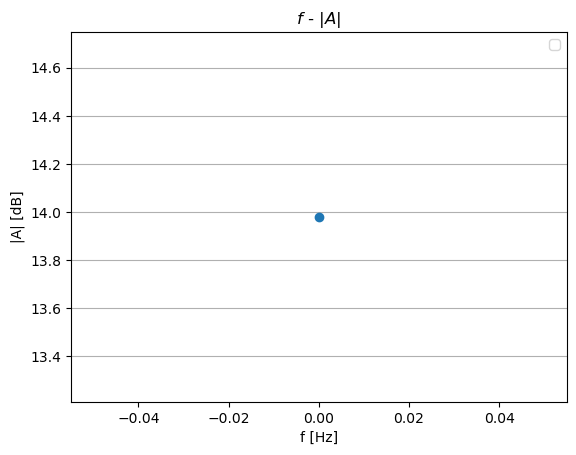

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="f [Hz]", grid="y", ylabel="|A| [dB]", title="$f$ - $|A|$")
ax.plot(data_e["f"], 20*np.log10(data_e["v_o"]/data_e["v_i"]), marker="o")
axessetting.apply_axes(ax)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


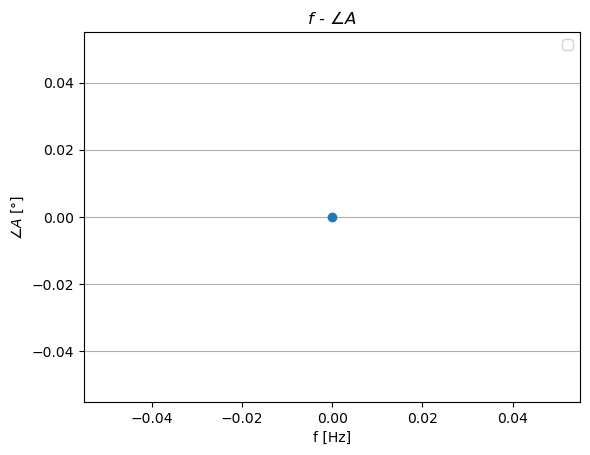

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="f [Hz]", grid="y", ylabel="$\\angle A$ [°]", title="$f$ - $\\angle A$")
ax.plot(data_e["f"], data_e["phase"], marker="o")
axessetting.apply_axes(ax)
